In [11]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../src")
import plot.plot_motifs as plot_motifs
import analysis.motif_compare as motif_compare
import analysis.motif_util as motif_util
import feature.util as feature_util
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Plotting defaults
plot_params = {
    "figure.titlesize": 22,
    "axes.titlesize": 22,
    "axes.labelsize": 20,
    "legend.fontsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "font.family": "Roboto",
    "font.weight": "bold",
    "svg.fonttype": "none"
}
plt.rcParams.update(plot_params)

### Define constants and paths

In [3]:
base_path = "/projects/site/gred/resbioai/tsenga5/mechint_regnet/"

In [4]:
# modisco_results_path = os.path.join(base_path, "results/impscore_modisco/simulated/spi1_exp_single/standard_cnn/modisco_results.h5")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/spi1_exp_single_config.json")
# neg_motif_config_path = None

In [5]:
# modisco_results_path = os.path.join(base_path, "results/impscore_modisco/simulated/tal_gata_exp_mix/standard_cnn/modisco_results.h5")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/tal_gata_exp_mix_config.json")
# neg_motif_config_path = None

In [6]:
# modisco_results_path = os.path.join(base_path, "results/impscore_modisco/simulated/rest_exp_both/standard_cnn/modisco_results.h5")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_exp_both_config.json")
# neg_motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_exp_both_neg_config.json")

In [12]:
modisco_results_path = os.path.join(base_path, "results/impscore_modisco/experimental/chipseq_foxa1_hepg2/standard_cnn/modisco_results.h5")

In [7]:
# modisco_results_path = os.path.join(base_path, "results/impscore_modisco/experimental/chipseq_max_hepg2/standard_cnn/modisco_results.h5")

In [ ]:
# modisco_results_path = os.path.join(base_path, "results/impscore_modisco/experimental/dnase_hl60/standard_cnn/modisco_results.h5")

### View MoDISco results

In [13]:
pfms, _, _, num_seqlets = motif_util.import_modisco_motifs(modisco_results_path)

In [14]:
# Trim PFMs by IC
trimmed_pfms = [
    motif_util.trim_motif_by_low_ic(pfm, motif_util.pfm_info_content(pfm), min_ic=0.05)
    for pfm in pfms
]
trimmed_pwms = [pfm * motif_util.pfm_info_content(pfm)[:, None] for pfm in trimmed_pfms]

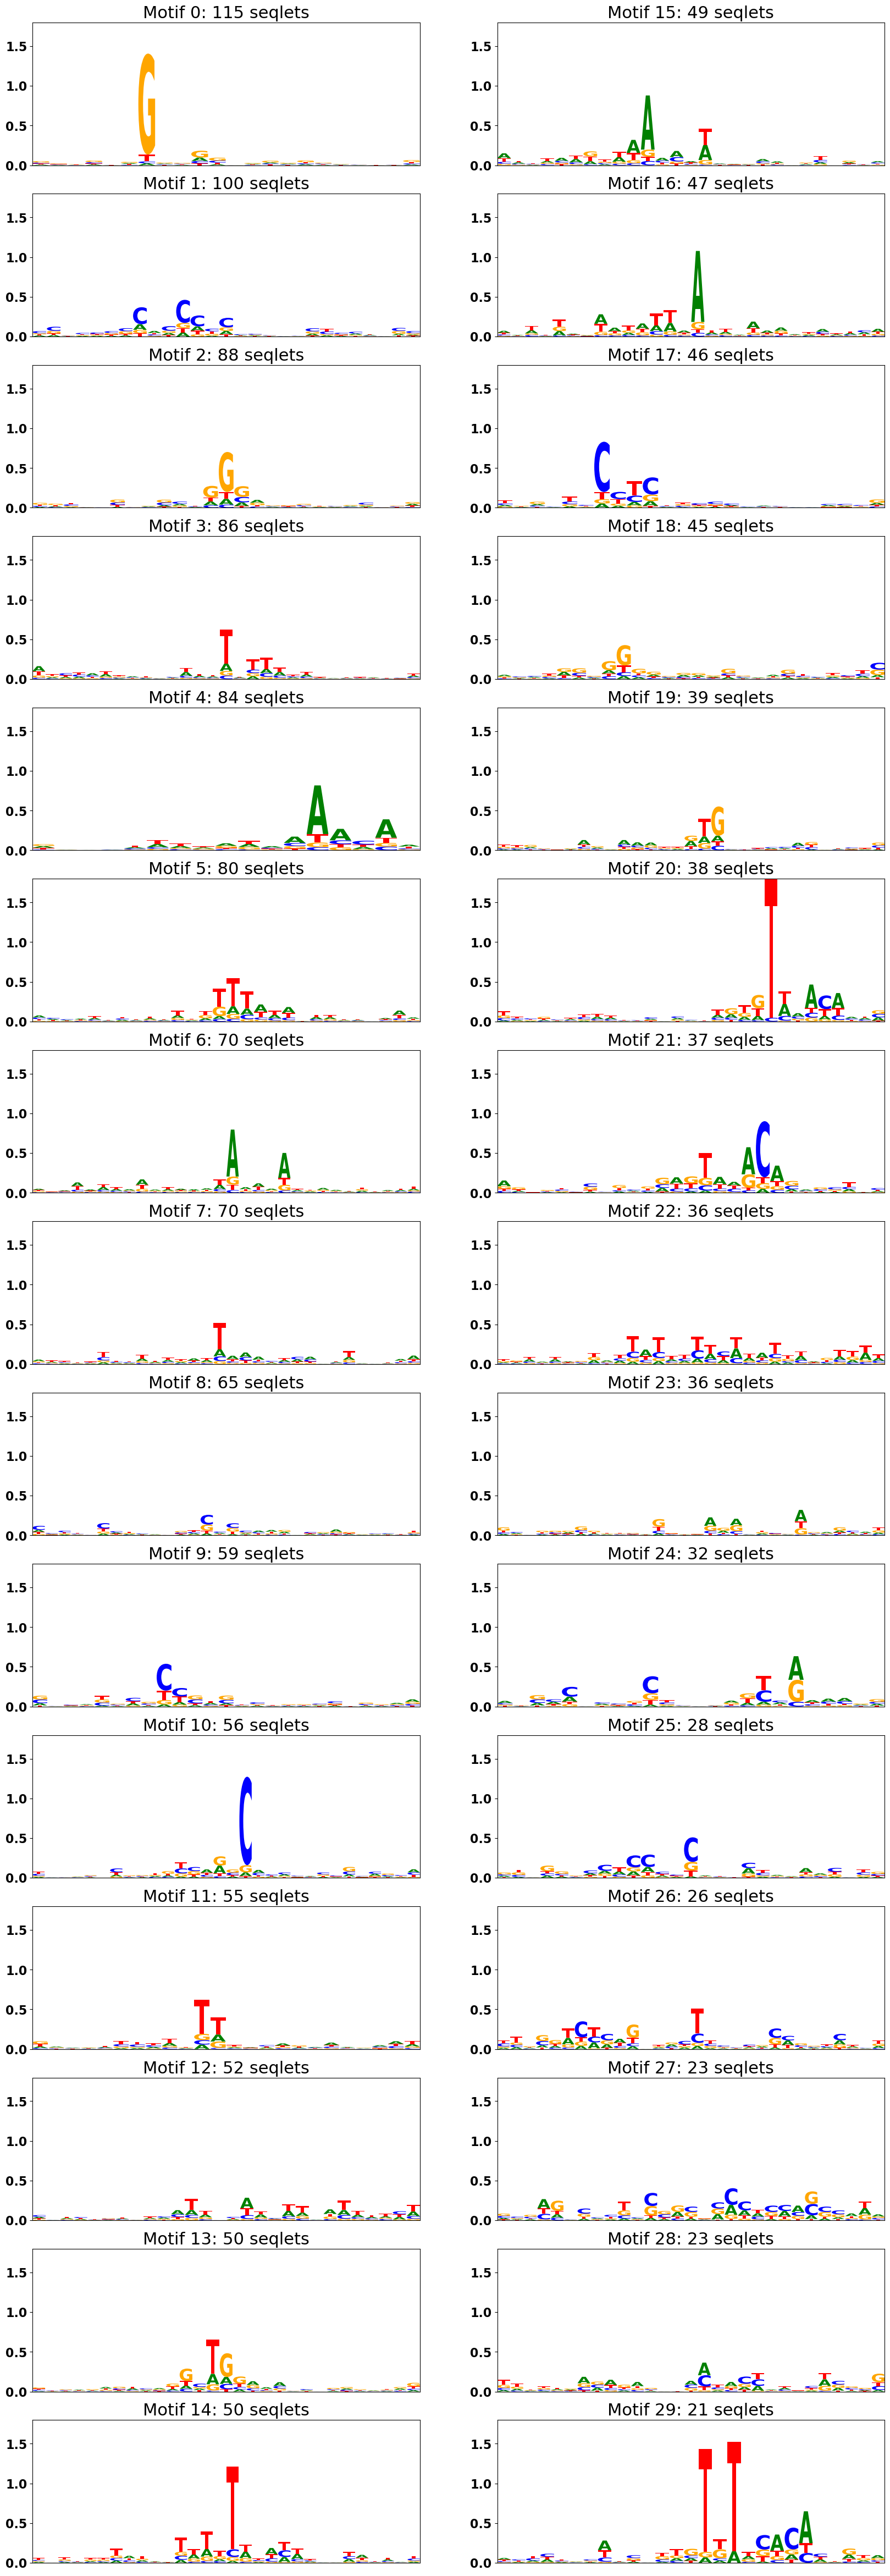

In [15]:
fig = plot_motifs.plot_motif_grid(
    trimmed_pwms,
    titles=["Motif %d: %d seqlets" % (i, num_seqlets[i]) for i in range(len(trimmed_pwms))],
    show_x=False
)

**Compare filter weights to true motif PFMs**

In [10]:
# Import true PFMs
with open(motif_config_path, "r") as f:
    motif_config = json.load(f)
motif_files = motif_config["motif_files"]
if neg_motif_config_path:
    with open(neg_motif_config_path, "r") as f:
        neg_motif_config = json.load(f)
    motif_files.extend(neg_motif_config["motif_files"])
motif_files = list(set(motif_files))

true_pfms = {}
for motif_file in motif_files:
    true_pfms.update(feature_util.import_meme_motifs(motif_file))

In [11]:
# For each motif, compute the closest true PFM
sim_func = lambda m1, m2: motif_compare.compute_motif_cross_correlation(m1, m2, length_norm=True)

matches = motif_compare.compute_closest_motifs(trimmed_pfms, true_pfms, sim_func=sim_func)
for i, row in enumerate(matches):
    print("%d\t%d\t%s" % (
        i, len(trimmed_pfms[i]), "\t".join(["%s%s:%.3f" % (trip[0], "_RC" if trip[1] else "", trip[2]) for trip in row])
    ))

0	10	TAL1_sanit:0.615	TAL1_sanit_RC:0.592	TAL1_exp_RC:0.522	TAL1_exp:0.509	GATA1_sanit:0.477	GATA1_exp_RC:0.464	GATA1_sanit_RC:0.432	GATA1_exp:0.399
1	6	GATA1_sanit_RC:0.688	GATA1_exp:0.666	TAL1_sanit_RC:0.472	TAL1_exp:0.424	GATA1_sanit:0.412	GATA1_exp_RC:0.397	TAL1_exp_RC:0.353	TAL1_sanit:0.325
2	7	GATA1_sanit_RC:0.765	GATA1_exp:0.658	GATA1_sanit:0.468	TAL1_sanit_RC:0.464	GATA1_exp_RC:0.445	TAL1_exp:0.408	TAL1_sanit:0.352	TAL1_exp_RC:0.333
3	6	GATA1_sanit:0.608	GATA1_exp_RC:0.588	TAL1_sanit:0.403	TAL1_exp_RC:0.365	TAL1_exp:0.309	GATA1_sanit_RC:0.297	GATA1_exp:0.291	TAL1_sanit_RC:0.288
4	10	GATA1_sanit_RC:0.586	GATA1_exp:0.527	GATA1_sanit:0.509	GATA1_exp_RC:0.495	TAL1_sanit:0.400	TAL1_sanit_RC:0.388	TAL1_exp:0.362	TAL1_exp_RC:0.302
5	10	GATA1_sanit_RC:0.618	GATA1_exp:0.580	GATA1_sanit:0.485	GATA1_exp_RC:0.427	TAL1_sanit_RC:0.382	TAL1_sanit:0.382	TAL1_exp_RC:0.359	TAL1_exp:0.353
6	21	GATA1_sanit:0.728	GATA1_exp_RC:0.636	TAL1_sanit:0.488	GATA1_sanit_RC:0.447	GATA1_exp:0.404	TAL1_sanit_RC